Data set Link :https://www.kaggle.com/datasets/ashishjangra27/malarial-cell-image

## <font color='green'> Importing Libraries </font>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2

from PIL import Image
import tensorflow.keras.layers as k
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils import to_categorical

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')


## <font color='green'> Data loading and Visualising </font>

 ### Parasitized Image

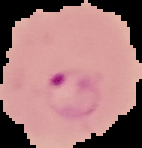

In [3]:
load_img('/kaggle/input/malarial-cell-image/Malarial Cell Image Data /cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png')

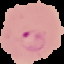

In [4]:
#changing the size of the image so that model trains on less features
load_img('/kaggle/input/malarial-cell-image/Malarial Cell Image Data /cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png',target_size = (64,64))

### Uninfected

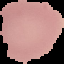

In [5]:
load_img('/kaggle/input/malarial-cell-image/Malarial Cell Image Data /cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_34.png',
        target_size = (64,64))

In [6]:
#setting the backend environment
os.environ['KERAS_BACKEND'] = 'tensorflow'
np.random.seed(312)

In [7]:
image_dir = '/kaggle/input/malarial-cell-image/Malarial Cell Image Data /malarial_cell_image_data/cell_images/cell_images/'
size = 64
dataset = []
label = []


In [8]:
para_imgs = os.listdir(image_dir + 'Parasitized/')

for conter,img in enumerate(tqdm(para_imgs)):
    if img.split('.')[1] == 'png':
        img_array = cv2.imread(image_dir + 'Parasitized/'+ img)
        img_array = Image.fromarray(img_array,'RGB')
        img_array = img_array.resize((size,size))
        
        dataset.append(np.array(img_array))
        label.append(0)
    

100%|██████████| 13780/13780 [01:16<00:00, 179.81it/s]


In [9]:
len(para_imgs)

13780

In [10]:
uninfected_img = os.listdir(image_dir + 'Uninfected/')

for conter,img in enumerate(tqdm(uninfected_img)):
    if img.split('.')[1] == 'png':
        img_array = cv2.imread(image_dir + 'Uninfected/'+ img)
        img_array = Image.fromarray(img_array,'RGB')
        img_array = img_array.resize((size,size))
        
        dataset.append(np.array(img_array))
        label.append(1)
        


100%|██████████| 13780/13780 [01:17<00:00, 176.98it/s]


In [11]:
len(uninfected_img)

13780

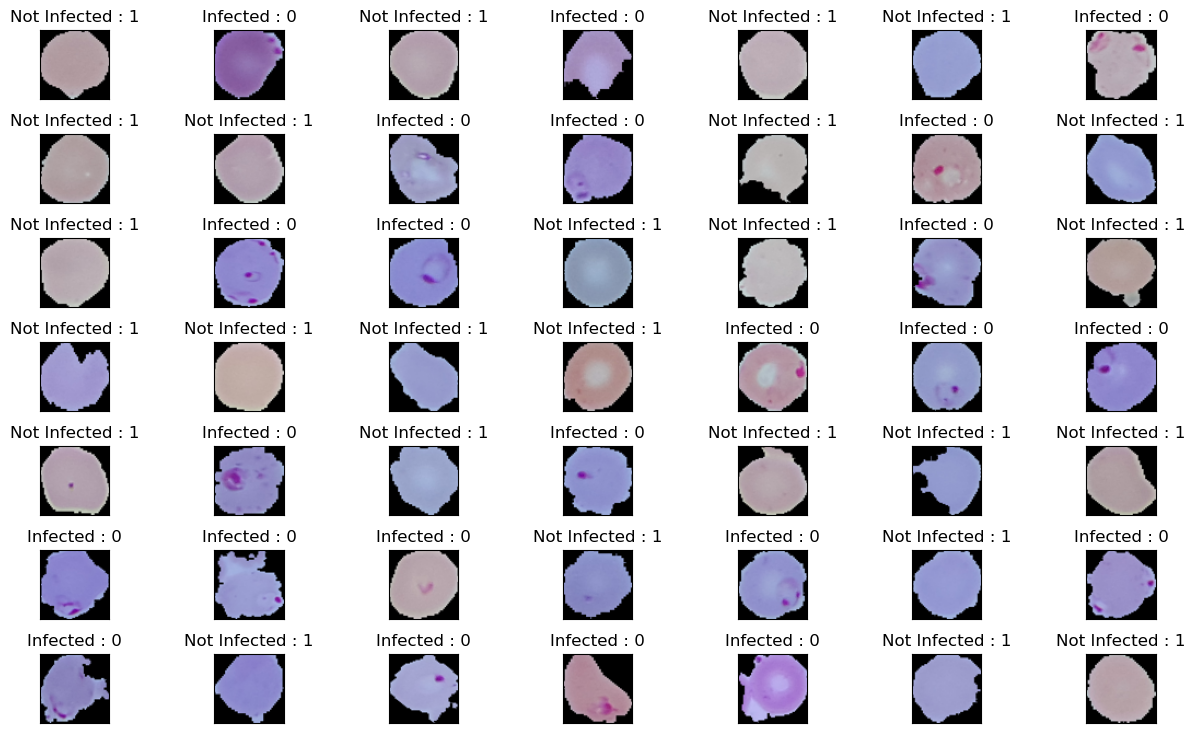

In [12]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , len(dataset) , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(dataset[r[0]])
    plt.title('{} : {}'.format('Not Infected' if label[r[0]] == 1 else 'Infected' ,
                               label[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

In [13]:
X_train,X_test,y_train,y_test = train_test_split(dataset,to_categorical(np.array(label)),test_size = 0.3,random_state = 0)

## <font color='green'> CNN Model Architecture </font>

In [15]:
INPUT_SHAPE = (size,size,3)

inp = k.Input(shape = INPUT_SHAPE)
#second layer-convolution layer(filter)
conv1 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(inp)
#pooling layer for dimension reduction
pool1 = k.MaxPool2D(pool_size=(2,2))(conv1)
#for unifiromity of data apply normalization
norm1 = k.BatchNormalization(axis=-1)(pool1)
#droping out some features so model will need to rethink
drop1 = k.Dropout(rate=0.2)(norm1)

conv2 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop1)
pool2 = k.MaxPool2D(pool_size=(2,2))(conv2)
norm2 = k.BatchNormalization(axis=-1)(pool2)
drop2 = k.Dropout(rate=0.2)(norm2)

conv3 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop2)
pool3 = k.MaxPool2D(pool_size = (2,2))(conv3)
norm3 = k.BatchNormalization(axis = -1)(pool3)
drop3 = k.Dropout(rate = 0.2)(norm3)

flat = k.Flatten()(drop3)

hidden1 = k.Dense(512,activation="relu")(flat)
norm3   = k.BatchNormalization(axis=-1)(hidden1)
drop3   = k.Dropout(rate=0.2)(norm3)

hidden2 = k.Dense(256,activation="relu")(drop3)
norm4   = k.BatchNormalization(axis=-1)(hidden2)
drop4   = k.Dropout(rate=0.2)(norm4)

out = k.Dense(2, activation='sigmoid')(drop4)


In [18]:
model = keras.Model(inputs = inp , outputs = out)
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics = ['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248  

In [19]:
history = model.fit(np.array(X_train),y_train,
                   batch_size= 128,verbose=1,epochs = 20,validation_split=0.1,shuffle=False)

Epoch 1/20


2023-07-14 09:00:17.670472: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


136/136 [==============================] - 17s 24ms/step - loss: 0.4951 - accuracy: 0.7831 - val_loss: 1.2010 - val_accuracy: 0.7486
Epoch 2/20
136/136 [==============================] - 3s 18ms/step - loss: 0.2224 - accuracy: 0.9203 - val_loss: 0.6753 - val_accuracy: 0.8657
Epoch 3/20
136/136 [==============================] - 3s 19ms/step - loss: 0.1736 - accuracy: 0.9403 - val_loss: 0.2682 - val_accuracy: 0.9186
Epoch 4/20
136/136 [==============================] - 3s 19ms/step - loss: 0.1537 - accuracy: 0.9466 - val_loss: 0.1615 - val_accuracy: 0.9461
Epoch 5/20
136/136 [==============================] - 3s 20ms/step - loss: 0.1436 - accuracy: 0.9484 - val_loss: 0.2297 - val_accuracy: 0.9378
Epoch 6/20
136/136 [==============================] - 3s 19ms/step - loss: 0.1306 - accuracy: 0.9529 - val_loss: 0.1766 - val_accuracy: 0.9533
Epoch 7/20
136/136 [==============================] - 3s 18ms/step - loss: 0.1182 - accuracy: 0.9601 - val_loss: 0.1591 - val_accuracy: 0.9559
Epoch 8/2

In [21]:
print("Test accuracy: {:.2f}%".format(model.evaluate(np.array(X_test),np.array(y_test))[1]*100))

259/259 [==============================] - 1s 5ms/step - loss: 0.2280 - accuracy: 0.9542
Test accuracy: 95.42%


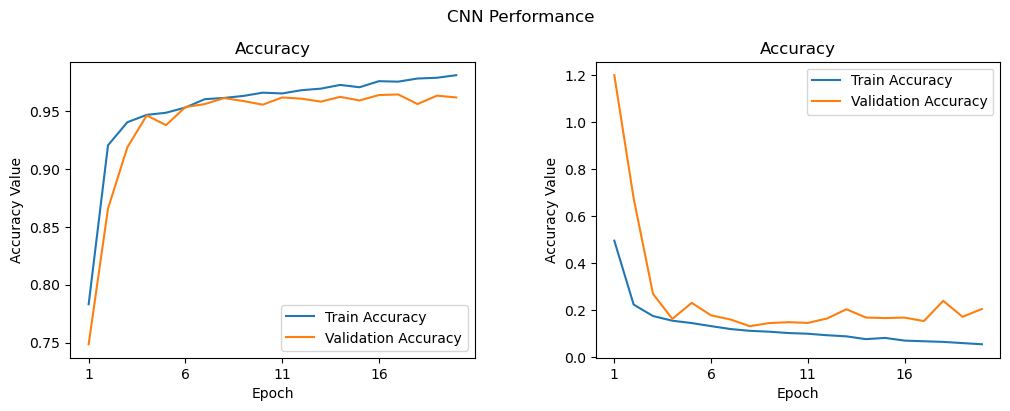

In [22]:
f,(ax1,ax2) = plt.subplots(1,2,figsize = (12,4))
t = f.suptitle('CNN Performance',fontsize=12)
f.subplots_adjust(top = 0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list,history.history['accuracy'],label = 'Train Accuracy')
ax1.plot(epoch_list,history.history['val_accuracy'],label = 'Validation Accuracy')
ax1.set_xticks(np.arange(1,max_epoch,5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc = "best")

ax2.plot(epoch_list,history.history['loss'],label = 'Train Accuracy')
ax2.plot(epoch_list,history.history['val_loss'],label = 'Validation Accuracy')
ax2.set_xticks(np.arange(1,max_epoch,5))
ax2.set_ylabel('Accuracy Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Accuracy')
l2 = ax2.legend(loc = "best")